# Reconnaissance de chiffre manuscrits

## Problème d'apprentissage:
L'objectif ici est de créer un model qui permet de reconnaitre les chiffres dans l'image qui lui a été founit.<br>
Le model devra donc à la fin être capable de classifier correctement les images qu'on lui donne dans leurs classes respective. Il s'agit donc d'un problème de ```Classification```.

## Importation des modules:

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# importation du module datatsets pour notre datatset
from sklearn import datasets
# importation du module pour l'utilisation de l'algorithme d'apprentissage SVM
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
# importation du module pour les différents metrique
from sklearn import metrics
# importation du module pour la division de nos données en données d'entrainement et de test
from sklearn.model_selection import train_test_split

## Chargement du dataset:

In [200]:
digits = datasets.load_digits()

## Exploration de données:

### Bref description de l'ensemble de données:
L'ensemble de données contient des images de chiffres écrits à la main : 10 classes où chaque classe fait référence à un chiffre.

Les programmes de prétraitement mis à disposition par le NIST ont été utilisés pour extraire des bitmaps (Une image matricielle, ou « carte de points », est une image constituée d'une matrice de points colorés. C'est-à-dire, constituée d'un tableau, d'une grille, où chaque case possède une couleur qui lui est propre et est considérée comme un point) normalisés de chiffres manuscrits à partir d'un formulaire préimprimé. Sur un total de 43 personnes, 30 ont contribué à l'ensemble de formation et 13 autres à l'ensemble de test. Les bitmaps 32x32 sont divisés en blocs non superposés de 4x4 et le nombre de pixels est compté dans chaque bloc. Cela génère une matrice d'entrée de 8x8 où chaque élément est un entier dans la plage 0..16. Cela réduit la dimensionnalité et donne de l'invariance aux petites distorsions.

### Description des differents caracteristique du dataset:
- ```digits.images```: il contient l'ensemble des images du dataset. Chaque image est répresenté sous forme de matrice de taile 8x8 pixels dont chaque valeur (valeur entière allant de 0 à 16) répresente le niveau de gris du pixel. En tout nous avons 1797 matrices, ie 1797 images. L'ensemble de ces 8x8 pixels donnent l'image d'un chiffre entre 0 et 9.
- ```digits.data```: il contient l'ensemble des pixels d'une image sans tenir compte de l'horizontal ou de la vertical. Les 8 prémières valeur representent les 8 pixels de la prémière ligne de la matrice d'une image dans la colonne ```images```, et ainsi de suite.
- ```digits.DESC```: la description du dataset.
- ```digits.target_names```: nos different classe unique (de 0 à 9)
- ```digits.target```: le target correspondant à chaque echantillon
- ```digits.feature_names```: les noms donné à chaque valeur d'une ligne de la colonne "data"
- ```digits.frame```: 

### Creation d'un data frame plus structuré:

In [201]:
# on a pas besoin de la colonne DESC et la colonne target_names
# DESC contient la description de l'ensemble de données
# target_names contient nos 10 classes (0, 1, 2, 3, 4, 5, 6, 7, 8 et 9)

df_digit = pd.DataFrame(
    {
        "data": [digits.data[i] for i in range(1797)], 
        "target": digits.target,
        "frame": digits.frame,
        "feature_names": [digits.feature_names for i in range(len(digits.data))],
        "images": [digits.images[i] for i in range(1797)],
    })


In [202]:
# dimenssion du data frame
df_digit.shape

(1797, 5)

In [203]:
# nombre de NaN dans chaque colonne
df_digit.isna().sum()

data                0
target              0
frame            1797
feature_names       0
images              0
dtype: int64

In [204]:
# nombre de valeur null dans chaque colonne
df_digit.isnull().sum()

data                0
target              0
frame            1797
feature_names       0
images              0
dtype: int64

In [205]:
# nombre de classe
df_digit.target.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Quelque manipulation du data frame:
#### Affichage des differentes valeurs de la première ligne

In [206]:
# les differents valeurs de pixel d'une image d'un digit rassemblé
df_digit.loc[0,"data"]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [207]:
# la valeur réelle d'une image
df_digit.loc[0,"target"]

0

In [208]:
# les differents valeurs de pixel d'une image d'un digit rassemblé de façon plus structuré (sous forme de matrice)
df_digit.loc[0,"images"]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [209]:
# les noms donné à chaque pixel de l'image du digit
# df_digit.loc[0,"feature_names"]

### Visualisation des 4 premières images: 

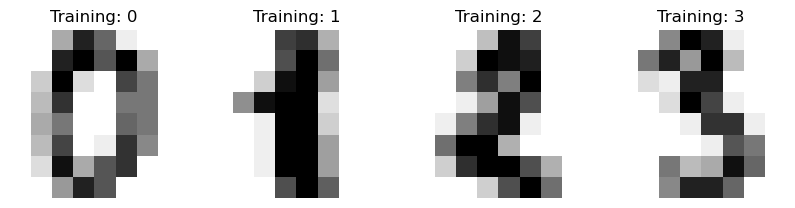

In [210]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df_digit["images"], df_digit["target"]):
    ax.set_axis_off() # pour supprimer les graduations des axes
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") # pour afficher les données sous forme d'image
    # cmap: definit la couleur
    # interpolation: joue en quelque sorte sur la profondeur de la nuance de couleur ;)
    ax.set_title(f"Training: {label}") # pour donner un titre à chaque image

### Différence avec nos autres dataset:
- On différencie clairement nos X (données d'entrée) et nos Y (target)
- Les donné sont déjà prétraité (l'encodage est fait, il n'y as pas de données manquante, etc.)
- Les Caractéristique d'un echantillon sont en majeur partie des ensembles de données

## Classification:
L'algorithme d'apprentissage qui sera utilsé est la ```SVM (Support Vector Machine)```

### Creation du data frame contenant uniquement nos X et nos Y:
Pour appliquer un classificateur sur ces données, nous allons recréer un data frame de taille ```n_samples x n_features```.<br>```n_samples``` est le nombre d'echantillons (1797) et ```n_features``` est le nombre de caracteristique de chaque echantillons (64 + 1, avec 1 qui correspond au target et 64 qui correspond au 8x8=64 pixel d'une image).

In [211]:
# Creation du data frame contenant les 64 colonnes pour les 8x8=64 pixels plus la target
df_class = pd.DataFrame(data=digits.data, columns=df_digit.feature_names[0])
df_class["taget"] = df_digit.target

In [212]:
df_class.tail(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,taget
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


#### Matrice de corrélation pour certaines colonne

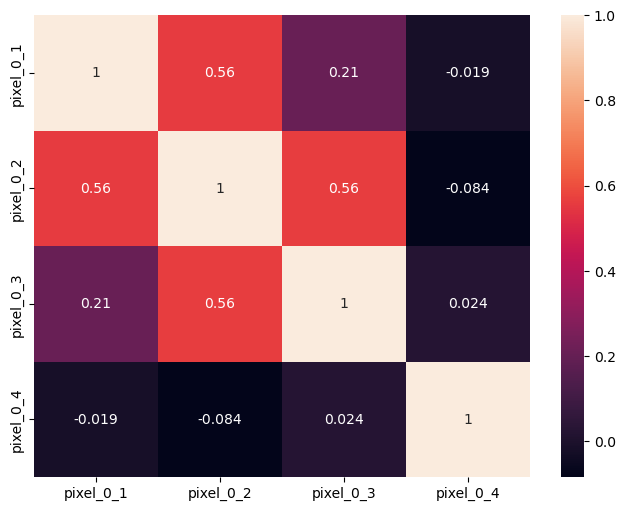

In [213]:
corr_df = df_class[["pixel_0_1","pixel_0_2","pixel_0_3","pixel_0_4"]].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

### Création des données X et Y:

In [214]:
X = df_class.iloc[:, :64]
Y = df_class.iloc[:, 64]

In [215]:
# X
# Y

### Creation du modèle:

In [237]:
# Création d'une instance de notre model
model = svm.SVC(gamma=0.001)

In [238]:
# model = KNeighborsClassifier(n_neighbors=5)

In [239]:
# Séparation de notre data en données d'entrainement (80%) et de test (20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [240]:
# Entrainement du model
model.fit(x_train, y_train)

SVC(gamma=0.001)

In [241]:
# Evaluation du score sur les données d'entrainement
model.score(x_train, y_train)

0.9993041057759221

In [242]:
# Prédiction
predict  = model.predict(x_test)

#### Exemple de données predite

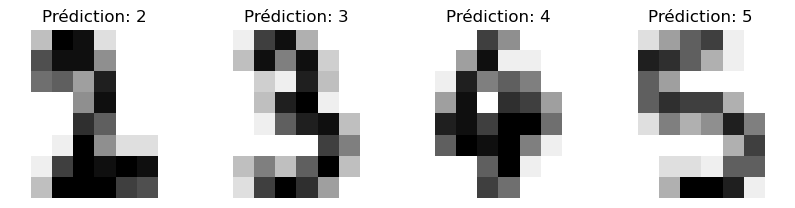

In [243]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, x_test.values, predict):
    image = image.reshape(8,8) # on fait un reshape à image pour passer d'un tableau de 1D de taille 64 à une matrice 2D de taille 8x8
    ax.set_axis_off() # pour supprimer les graduations des axes
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") # pour afficher les données sous forme d'image
    # cmap: definit la couleur
    # interpolation: joue en quelque sorte sur la profondeur de la nuance de couleur ;)
    ax.set_title(f"Prédiction: {label}") # pour donner un titre à chaque image

### Métriques


In [244]:
metrics.accuracy_score(y_test, predict)

0.9583333333333334

In [234]:
len(y_test)

360

In [224]:
print(
    f"Rapport des différents metrique du classificateur {model} pour chacune de nos classe (0 à 9):\n"
    f"{metrics.classification_report(y_test, predict)}\n"
)

Rapport des différents metrique du classificateur SVC(gamma=0.001) pour chacune de nos classe (0 à 9):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  2  0  1  4  0]
 [ 0  0  0  0 34  0  0  0  2  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  0  0 35]]


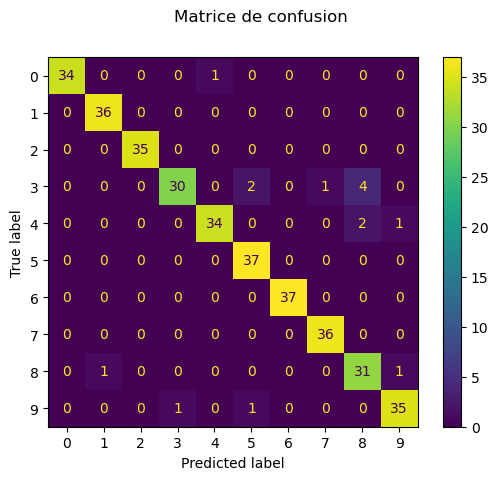

In [225]:
# affichage de la matrice de confusion

conf_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict)
conf_matrix.figure_.suptitle("Matrice de confusion")
print(conf_matrix.confusion_matrix)
plt.show()